Importing the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import the Dataset

In [3]:
data = pd.read_csv('/content/NSE All Share Historical Data.csv')

First 5 rows

In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 18, 2024","100,477.46","100,050.94","100,477.46","100,050.94",389.70M,0.43%
1,"Dec 17, 2024","100,050.94","99,927.85","100,086.21","99,791.29",477.88M,0.13%
2,"Dec 16, 2024","99,922.63","99,389.34","100,086.80","99,389.15",740.89M,0.55%
3,"Dec 13, 2024","99,378.28","98,760.59","99,383.94","98,724.45",534.23M,0.63%
4,"Dec 12, 2024","98,760.59","98,509.68","98,766.00","98,500.57",489.65M,0.25%


Last 5 rows

In [5]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
3187,"Feb 03, 2012","20,877.64","20,822.00","20,863.93","20,786.35",-,0.27%
3188,"Feb 02, 2012","20,822.00","20,872.94","20,900.58","20,785.40",-,0.15%
3189,"Feb 01, 2012","20,790.88","20,875.34","20,941.03","20,790.88",-,-0.41%
3190,"Jan 31, 2012","20,875.83","20,818.56","21,009.92","20,789.48",-,0.70%
3191,"Jan 30, 2012","20,731.72","20,939.10","20,950.02","20,731.72",-,-0.77%


Rows and Columns

In [6]:
data.shape

(3192, 7)

Info about Dataframe

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3192 non-null   object
 1   Price     3192 non-null   object
 2   Open      3192 non-null   object
 3   High      3192 non-null   object
 4   Low       3192 non-null   object
 5   Vol.      3192 non-null   object
 6   Change %  3192 non-null   object
dtypes: object(7)
memory usage: 174.7+ KB


Describe Function for the Dataframe

In [8]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3192,3192,3192,3192,3192,3192,3192
unique,3192,3183,3182,3175,3182,1847,511
top,"Dec 18, 2024","28,344.04","20,658.28","37,259.65","37,278.34",-,0.02%
freq,1,2,3,4,3,1297,37


Convert 'Date' to datetime

In [10]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


Remove commas and convert price-related columns to float

In [11]:
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

Clean 'Vol.' column

In [40]:
def parse_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1_000_000
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1_000
        elif 'B' in vol:
            return float(vol.replace('B', '')) * 1e9
        elif vol == '-' or vol == '':
            return pd.NA
        else:
            try:
                return float(vol)
            except ValueError:
                return pd.NA
    return vol
data['Vol.'] = data['Vol.'].apply(parse_volume)

Clean 'Change %' column (Remove % symbol)

In [13]:
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

DATA CLEANING

Check for Null Values

In [42]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,1297
Change %,0
Price_Z,0
Short_MA,19
Long_MA,49


Handling null value in 'Vol.'

In [45]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Vol.'] = data['Vol.'].fillna(data['Vol.'].median())
data['Short_MA'] = data['Short_MA'].fillna(data['Short_MA'].median())
data['Long_MA'] = data['Long_MA'].fillna(data['Long_MA'].median())

In [46]:
data.isnull().sum().sum()

0

Check for Duplicate values

In [47]:
data.duplicated().sum()

0

EDA

Candlestick Chart of NSE All Share

In [48]:
import plotly.graph_objects as go
# Calculate the peak value
peak_value = data['High'].max()
peak_date = data.loc[data['High'].idxmax(), 'Date'].date()

# Creation of the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Price'],
    name='Price Movement'
)])

# Add annotation for the peak value
fig.add_trace(go.Scatter(
    x=[peak_date],
    y=[peak_value],
    mode='markers+text',
    text=[f'Peak: {peak_value}'],
    textposition='top center',
    marker=dict(color='red', size=10),
    name='Peak'
))

# Update layout
fig.update_layout(
    title='Candlestick Chart of NSE All Share',
    xaxis_title='Date',
    yaxis_title='Price'
)

# Print the peak value
print(f"The peak value is {peak_value} on {peak_date}")

# Show the chart
fig.show()



The peak value is 106087.84 on 2024-02-19


Highest closing price in Line chart

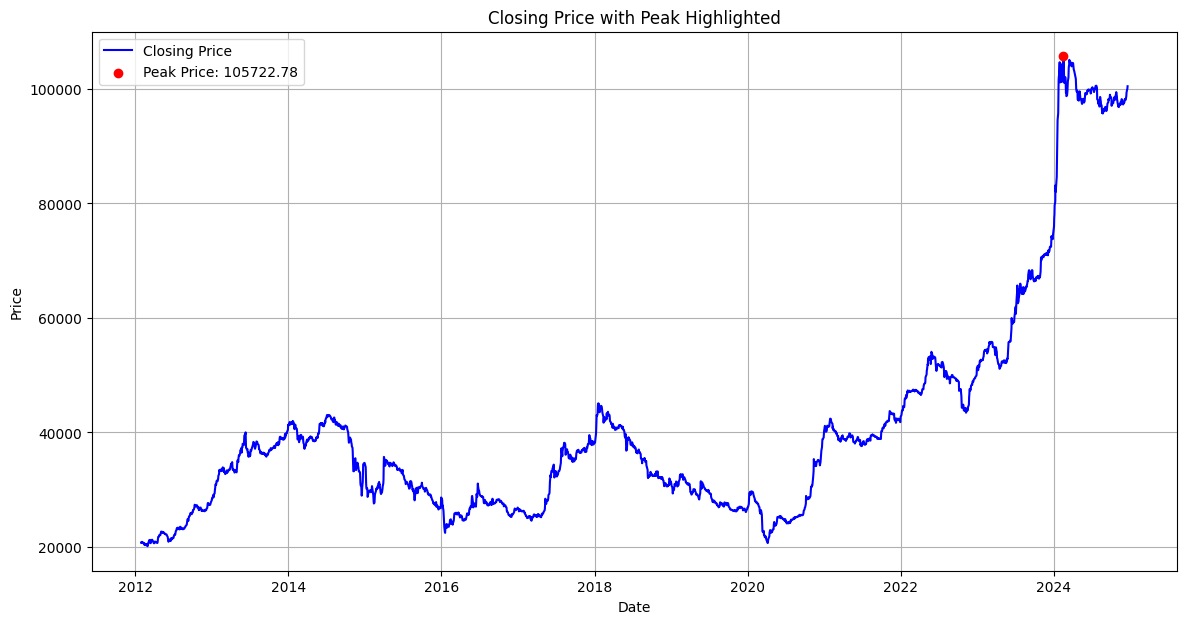

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Identify the peak price
peak_date = data.loc[data['Price'].idxmax(), 'Date']
peak_price = data['Price'].max()

# Plot the price with peak highlighted
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label='Closing Price', color='blue')
plt.scatter(peak_date, peak_price, color='red', label=f'Peak Price: {peak_price}', zorder=5)
plt.title('Closing Price with Peak Highlighted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Time-Series Decomposition

Break down price data into trend, seasonal, and residual components.

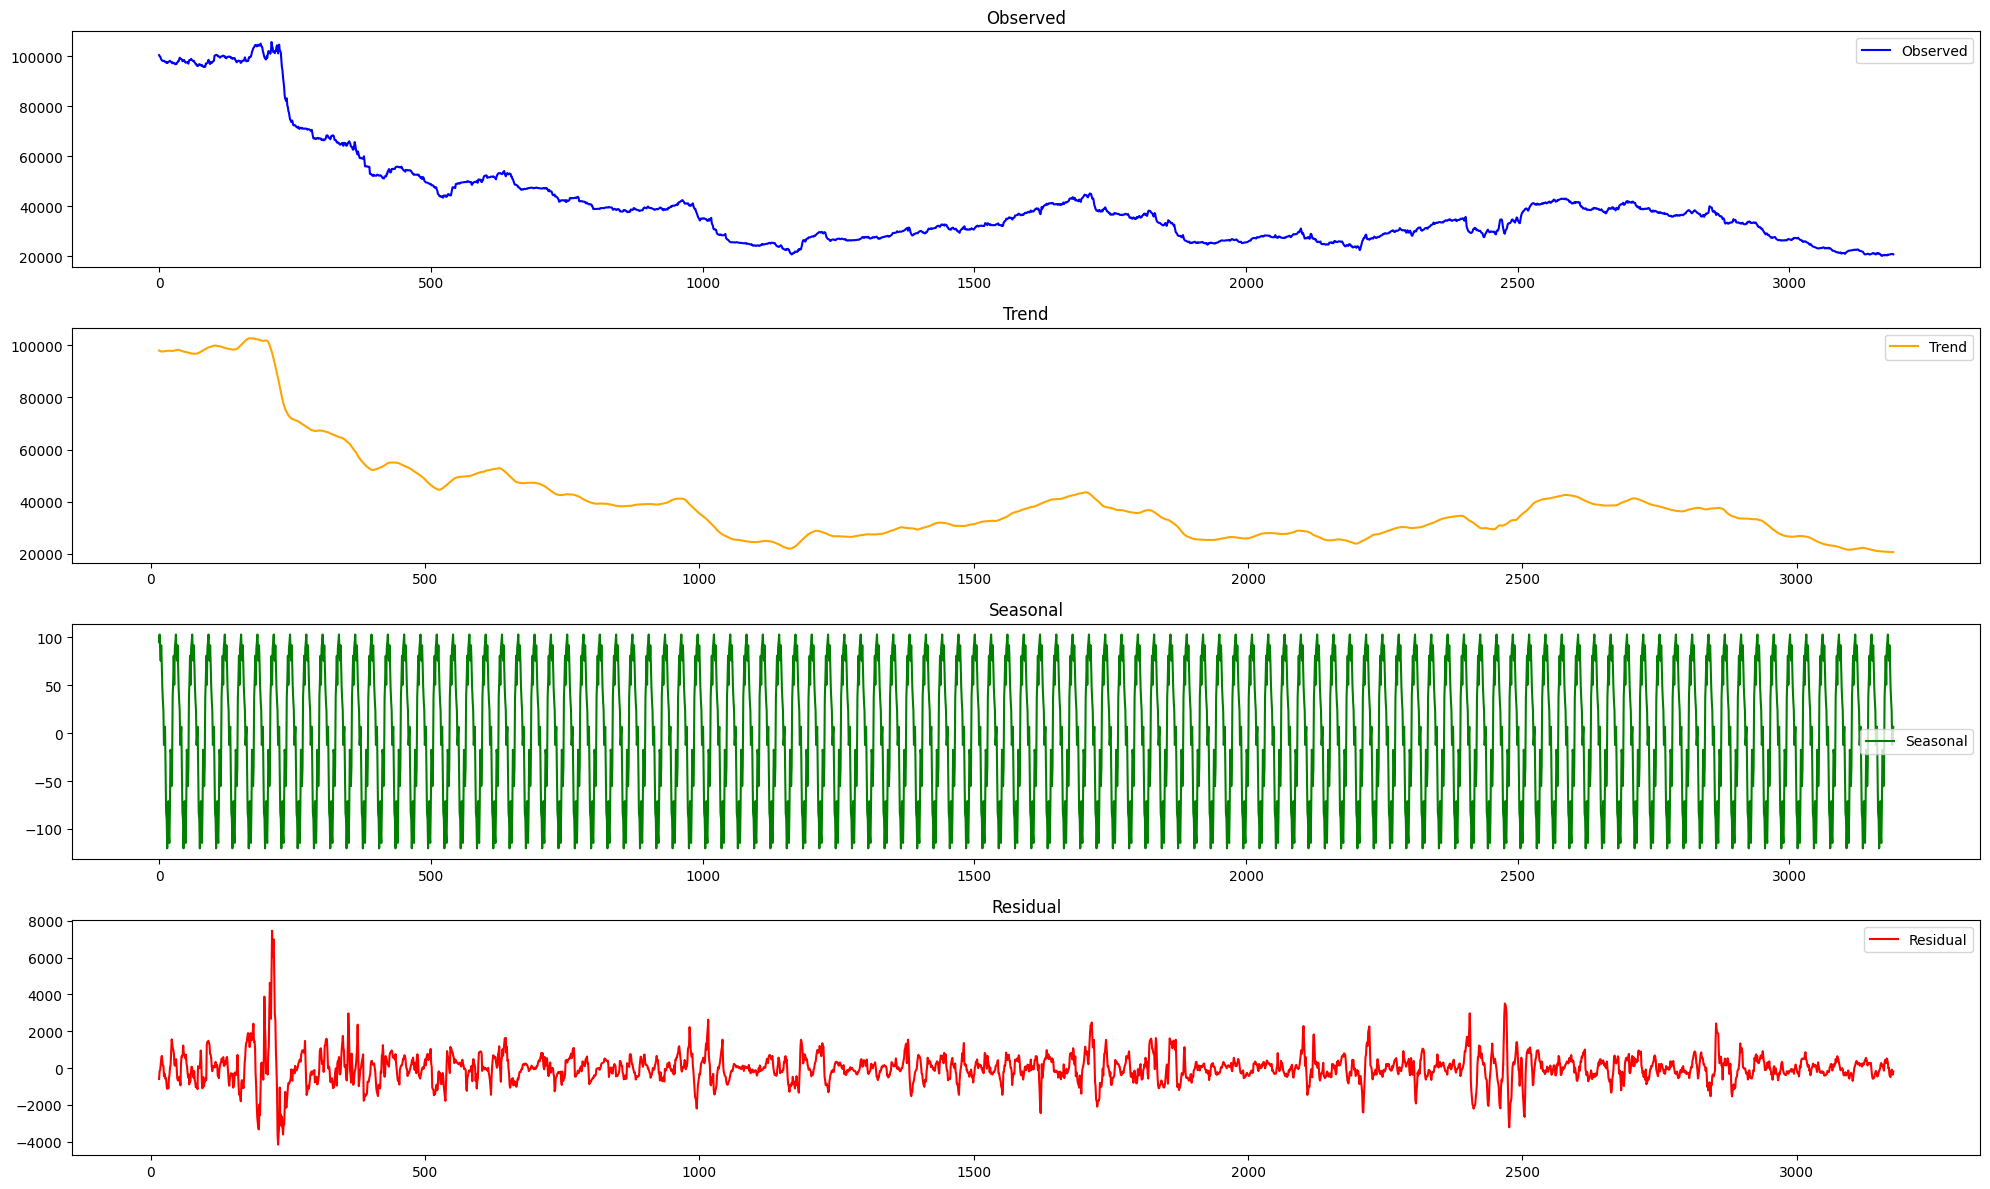

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Price'], model='additive', period=30)
observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20, 12))
plt.subplot(4, 1, 1)
plt.plot(observed, label='Observed', color='blue')
plt.title('Observed')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual')
plt.legend()
plt.tight_layout()
plt.show()

Moving Average Crossovers

Peak Golden Crossover Value: 102678.11, Date: 2024-01
Lowest Golden Crossover Value: 22009.94, Date: 2012-05


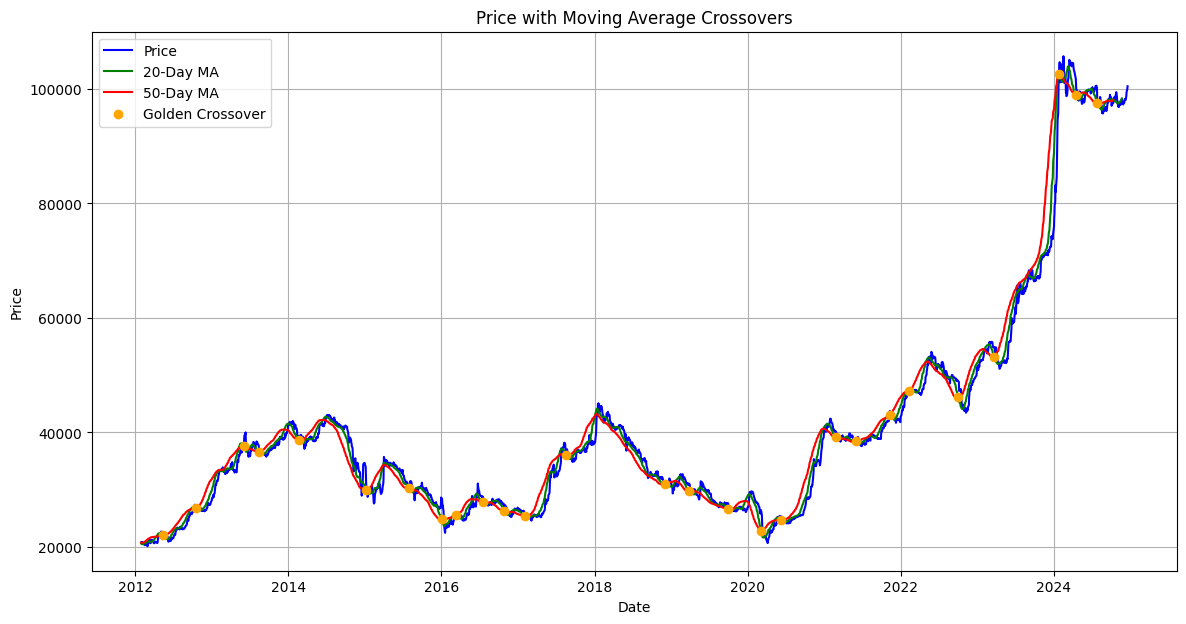

In [67]:
# Identify crossover points
data['Short_MA'] = data['Price'].rolling(window=20).mean()
data['Long_MA'] = data['Price'].rolling(window=50).mean()

crossover_dates = data[(data['Short_MA'] > data['Long_MA']) & (data['Short_MA'].shift(1) <= data['Long_MA'].shift(1))]
# Find the peak and lowest value of the golden crossover
crossover_dates = crossover_dates.copy()  # Create a copy to avoid modifying the original DataFrame
crossover_dates['Month_Year'] = crossover_dates['Date'].dt.to_period('M')

# Get the peak and lowest value
peak_value = crossover_dates['Short_MA'].max()
lowest_value = crossover_dates['Short_MA'].min()

# Get the month and year of the peak and lowest crossover values
peak_date = crossover_dates.loc[crossover_dates['Short_MA'] == peak_value, 'Month_Year'].iloc[0]
lowest_date = crossover_dates.loc[crossover_dates['Short_MA'] == lowest_value, 'Month_Year'].iloc[0]

# Print the results
print(f"Peak Golden Crossover Value: {peak_value:.2f}, Date: {peak_date}")
print(f"Lowest Golden Crossover Value: {lowest_value:.2f}, Date: {lowest_date}")

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label='Price', color='blue')
plt.plot(data['Date'], data['Short_MA'], label='20-Day MA', color='green')
plt.plot(data['Date'], data['Long_MA'], label='50-Day MA', color='red')
plt.scatter(crossover_dates['Date'], crossover_dates['Short_MA'], color='orange', label='Golden Crossover', zorder=5)
plt.title('Price with Moving Average Crossovers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Lowest Volatility Analysis

The lowest price is 20007.19 on 2012-02-29


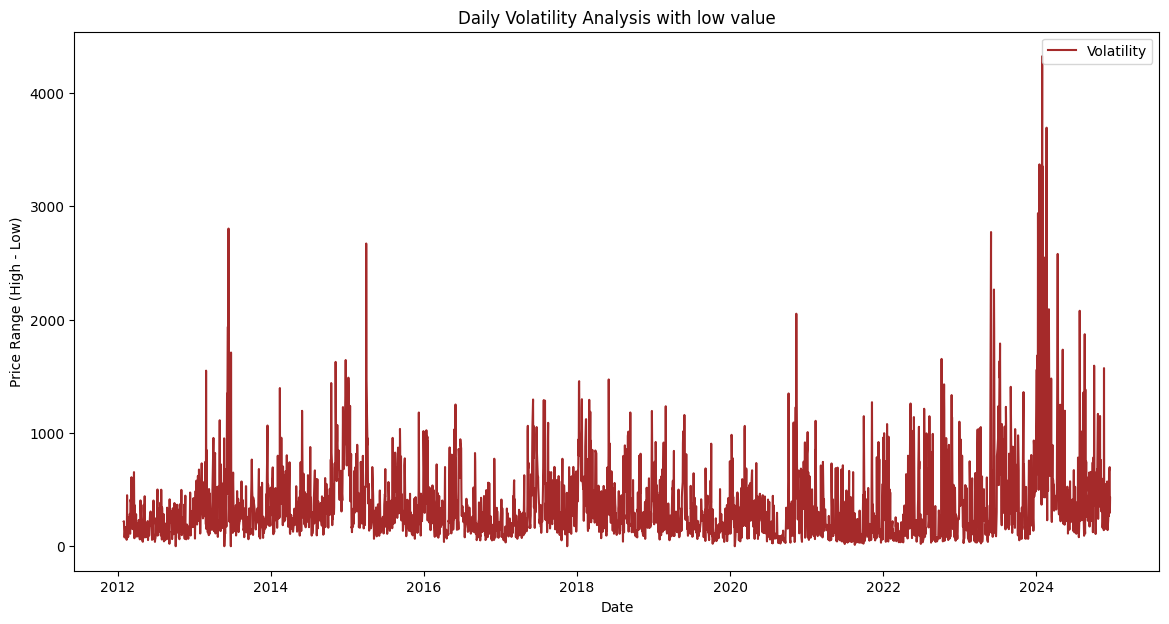

In [63]:
lowest_price = data['Low'].min()
lowest_price_date = data.loc[data['Low'].idxmin(), 'Date'].date()
print(f"The lowest price is {lowest_price} on {lowest_price_date}")
#plt.scatter(lowest_price_date, lowest_price, color='green', label=f'Peak Volatility: {lowest_price}', zorder=5)
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volatility'], label='Volatility', color='brown')
plt.title('Daily Volatility Analysis with low value')
plt.xlabel('Date')
plt.ylabel('Price Range (High - Low)')
plt.legend()
plt.show()

Correlation Heatmap

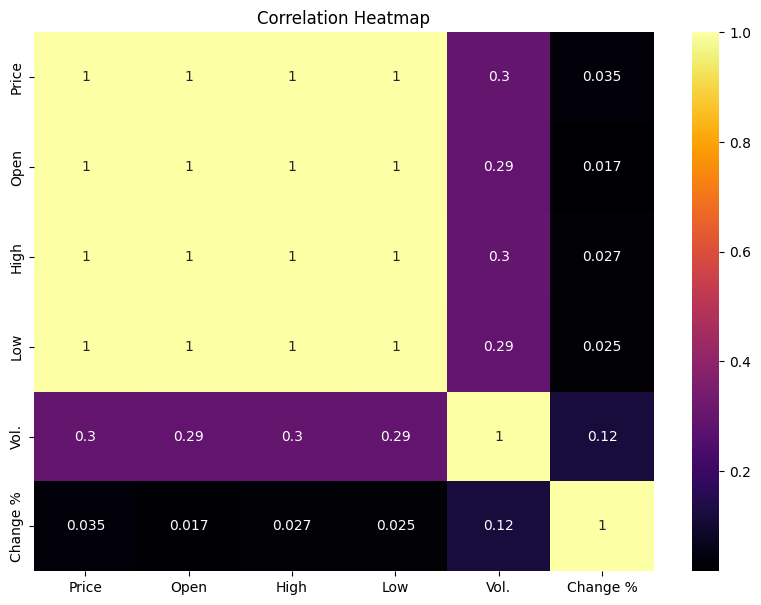

In [56]:
import seaborn as sns
correlation_matrix = data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()

Highest Volatility Analysis

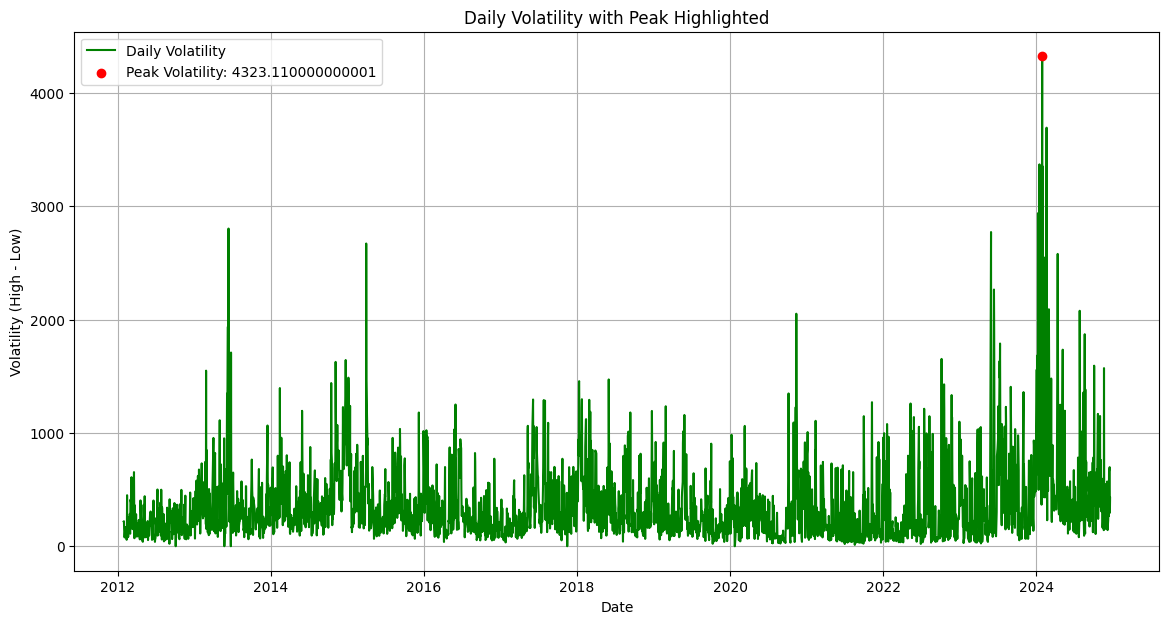

Peak Volatility: 4323.110000000001 on 2024-01-29


In [64]:
# Calculate daily volatility
data['Volatility'] = data['High'] - data['Low']

# Identify the peak volatility
peak_volatility_date = data.loc[data['Volatility'].idxmax(), 'Date'].date()
peak_volatility = data['Volatility'].max()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volatility'], label='Daily Volatility', color='green')
plt.scatter(peak_volatility_date, peak_volatility, color='red', label=f'Peak Volatility: {peak_volatility}', zorder=5)
plt.title('Daily Volatility with Peak Highlighted')
plt.xlabel('Date')
plt.ylabel('Volatility (High - Low)')
plt.legend()
plt.grid()
plt.show()

print(f"Peak Volatility: {peak_volatility} on {peak_volatility_date}")
